# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?


<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****



In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import scipy.stats as ss

df = pd.read_csv('data/human_body_temperature.csv')

# 1.  Is the distribution of body temperatures normal?

### Yes, but it is slightly skewed to the left.

(array([  2.,   2.,   2.,   4.,   9.,   6.,  10.,  16.,  18.,  12.,  18.,
         12.,  11.,   4.,   1.,   0.,   2.,   0.,   0.,   1.]),
 array([  96.3  ,   96.525,   96.75 ,   96.975,   97.2  ,   97.425,
          97.65 ,   97.875,   98.1  ,   98.325,   98.55 ,   98.775,
          99.   ,   99.225,   99.45 ,   99.675,   99.9  ,  100.125,
         100.35 ,  100.575,  100.8  ]),
 <a list of 20 Patch objects>)

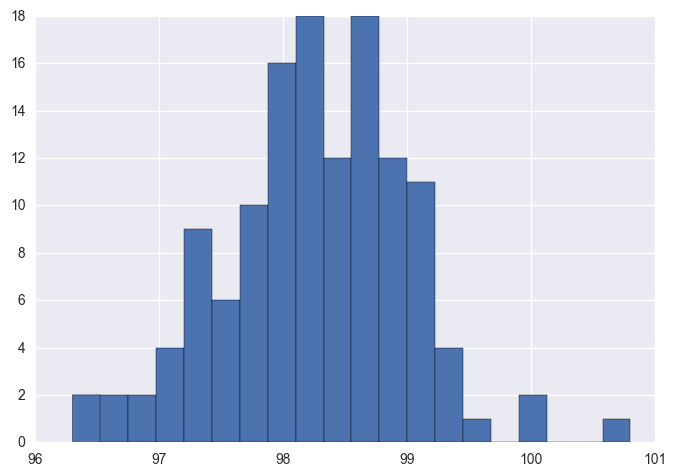

In [2]:
x = df.temperature
plt.hist(x, bins=20)

# 2. Is the sample size large? Are the observations independent?


### Yes it is well over 30. Yes as far as we know.


In [3]:
len(df)

130

# 3. Is the true population mean really 98.6 degrees F?
### No! Our z stat was -5.45.  This means it is VERY unlikely that 98.6 degress is the true pop mean.

# Would you use a one-sample or two-sample test? Why?
### One-sample because we are trying to find the mean for all humans; we are not separating by gender.

# In this situation, is it appropriate to use the t or z statistic?
### A z-statistic because the sample size is over 30.

# Now try using the other test. How is the result be different? Why?
### It's not.  They use the same formula

In [4]:
x = df.temperature
smean= x.mean()
pmean= 98.6
sstd= x.std(ddof=1)
ss= len(df)

zstat = (smean - pmean) / (sstd / np.sqrt(ss))
zstat

-5.4548232923640789

# 4. At what temperature should we consider someone's temperature to be "abnormal"?
# Start by computing the margin of error and confidence interval.





In [5]:
zscore=1.96

margin= zscore * (sstd / np.sqrt(ss))
top = smean + margin
bottom = smean - margin

print('margin of error = ' + str(margin))
print ('95% CI = ('+ str(bottom) + ' , ' + str(top) + ')')

margin of error = 0.126036657002
95% CI = (98.1231941122 , 98.3752674262)


# 5. Is there a significant difference between males and females in normal temperature?


### Yes. the t statistic is very significant at -2.285

In [6]:
males= df[df.gender == 'M'].temperature
females= df[df.gender == 'F'].temperature

smean1= males.mean()
smean2= females.mean()
svar1= males.var()
svar2= females.var()
ss1= 65
ss2= 65

tstat= (smean1 - smean2) / (sqrt((svar1 / ss1) + (svar2 / ss2)))
tstat

-2.2854345381652741

# What test did you use and why?

### The Hypothesis test for difference of means because we had to independent random samples.

# Write a story with your conclusion in the context of the original problem.

### We are over 95% confident that Males and Females do not have the same mean body temperature.